Import libraries

In [12]:
!pip install pandas_datareader

  Using cached pandas_datareader-0.10.0-py3-none-any.whl.metadata (2.9 kB)
Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)


In [1]:
# Import libraries and functions

import re, seaborn as sns, numpy as np, pandas as pd, random, matplotlib as mpl, matplotlib.pyplot as plt, matplotlib.cbook as cbook, pandas_datareader as pdr

from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

### Timeplot (time series)

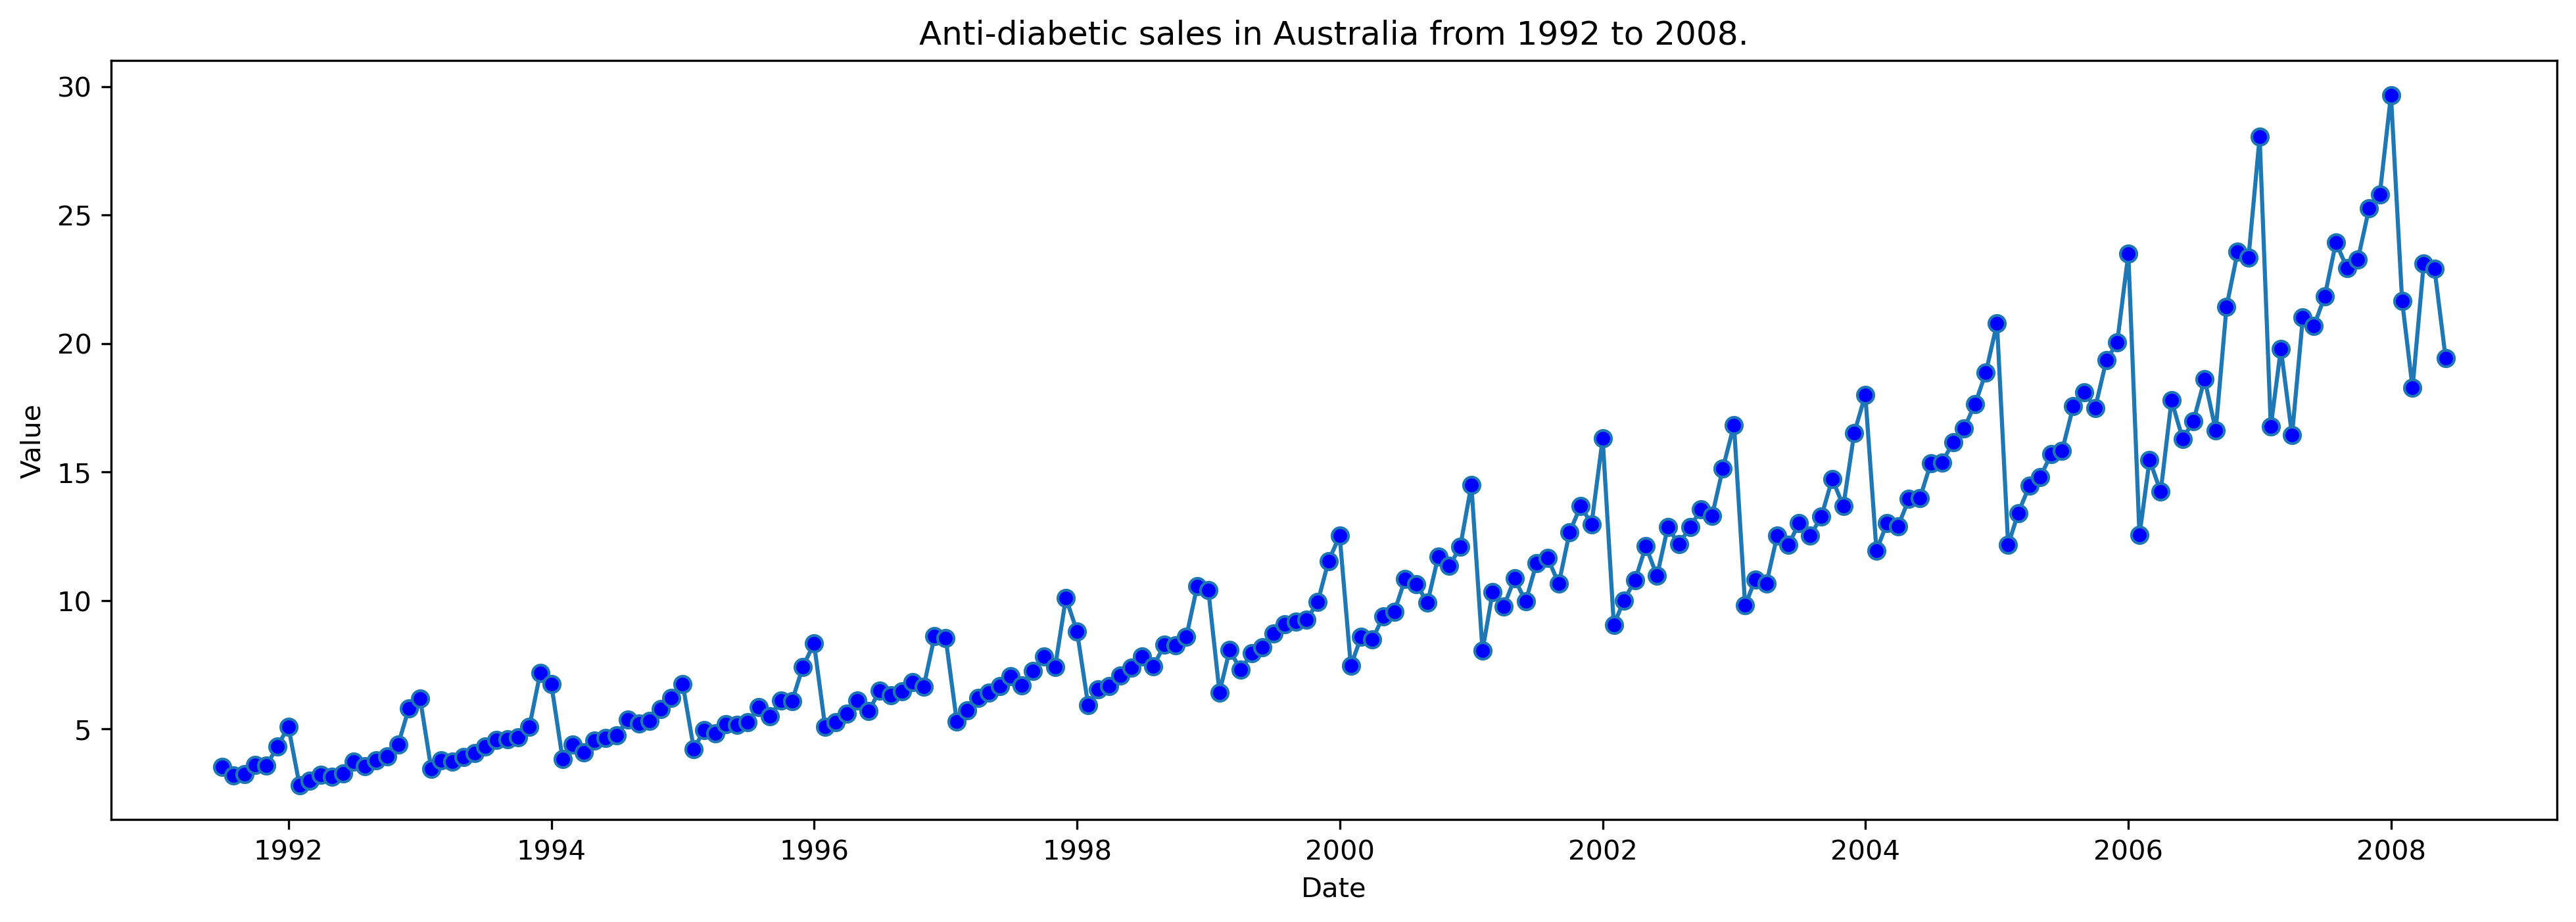

In [2]:
### Timeplot (time series)
# Plotting one variable time variation:

# Load time series data at Github.
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# define 'tplot' function
def tplot(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=300):
    """
    Function to plot time series data.

    Parameters:
        df (DataFrame): Input DataFrame containing time series data.
        x (array-like): Values for x-axis, typically the index of the DataFrame.
        y (array-like): Values for y-axis, representing the variable to be plotted.
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        dpi (int): Dots per inch for the resolution of the plot.

    Returns:
        None
    """
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, marker='o', markerfacecolor='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

# Plot the time series data using the defined function
tplot(df, x=df.index, y=df.value, title='Anti-diabetic sales in Australia from 1992 to 2008.')

#### Seasonal Plot of a Time Series

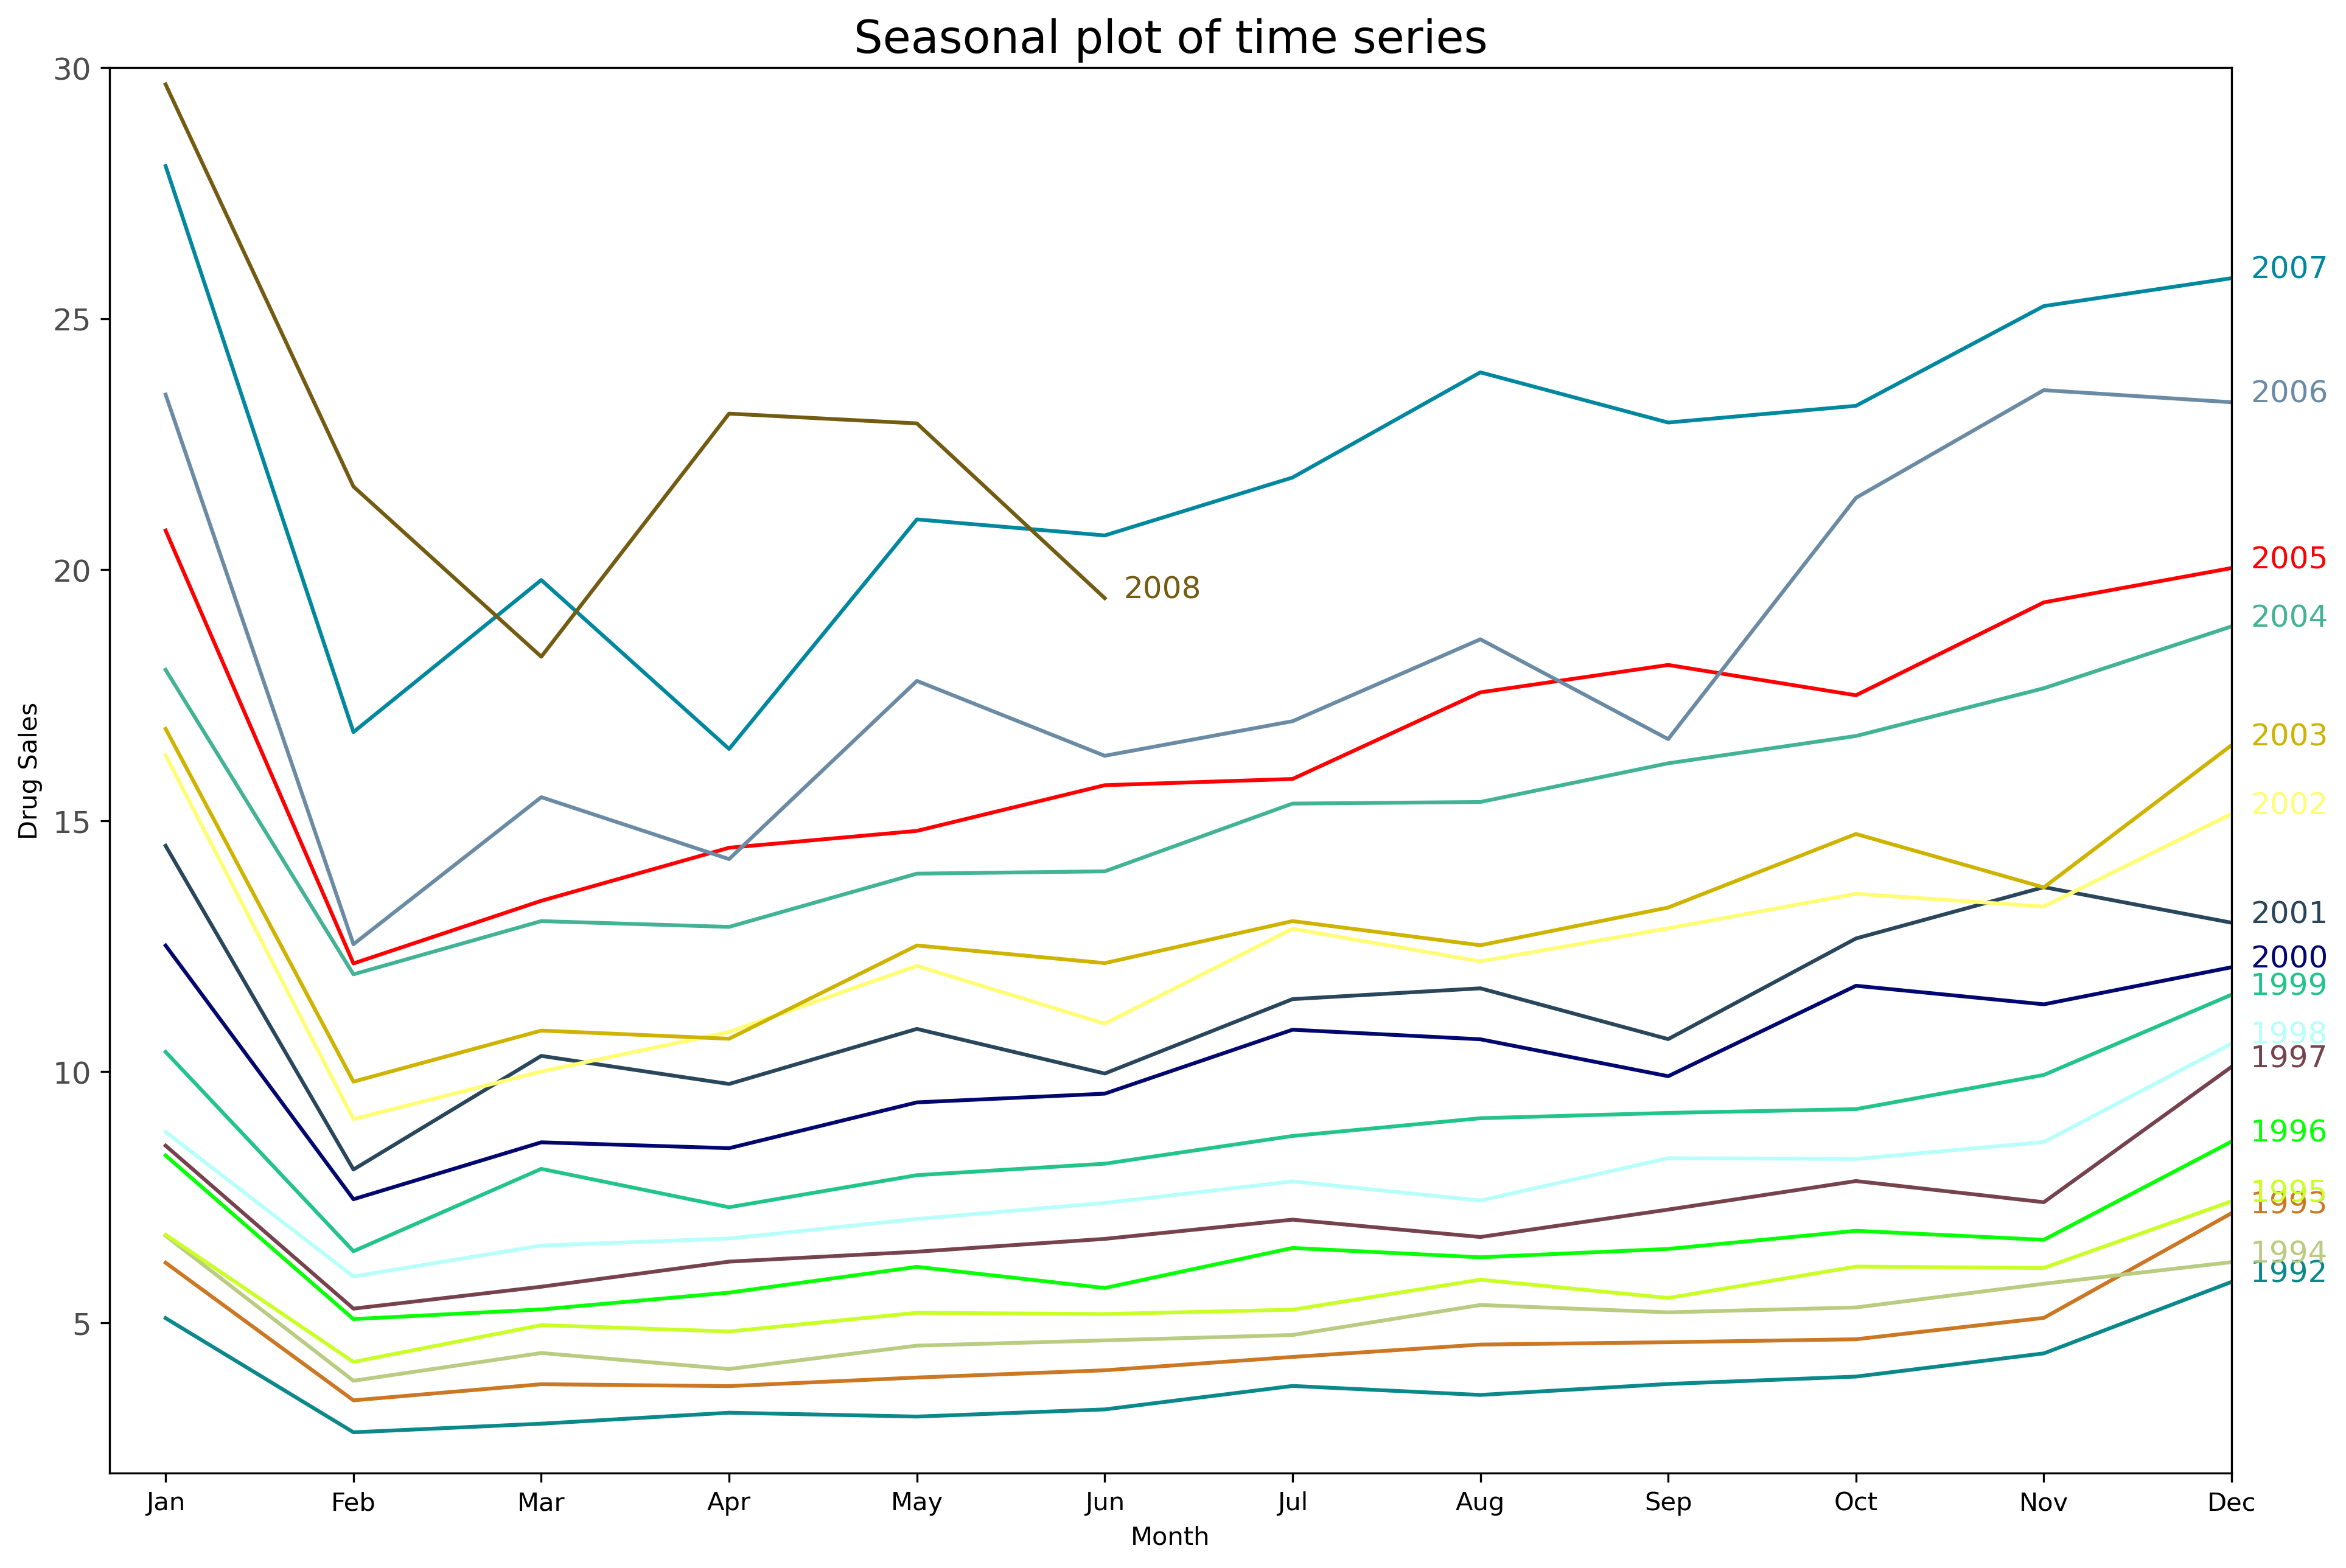

In [15]:
#### Seasonal Plot of a Time Series

# Load Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prepare Colors
np.random.seed(50)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(15,10), dpi= 300)
for i, y in enumerate(years):
    if i > 0:        
        # Plot each year's data with a different color
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        # Add text annotation for each year's ending value
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='Drug Sales', xlabel='Month')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal plot of time series", fontsize=18)
plt.show()

#### Plotting two variables time series

<Axes: >

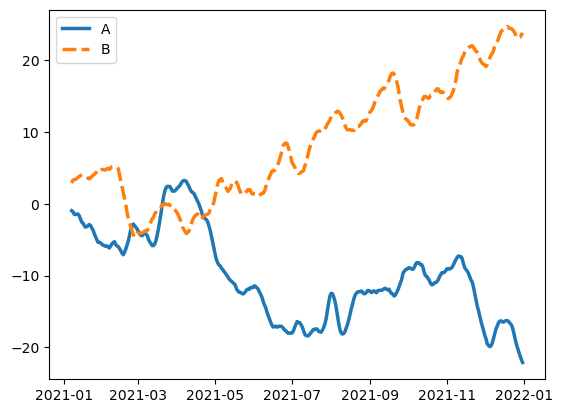

In [3]:
#### Plotting two variables time series:

rs = np.random.RandomState(365) # create data
# Generate random data for two variables and calculate cumulative sum along the rows
values = rs.randn(365, 2).cumsum(axis=0)
# Generate date range starting from January 1, 2021, with a frequency of 1 day
dates = pd.date_range("1 1 2021", periods=365, freq="D")
# Create a DataFrame with the generated data, indexed by dates and with columns named "A" and "B"
data = pd.DataFrame(values, dates, columns=["A", "B"])
# Perform a rolling mean calculation with a window size of 7 days to smooth the data
data = data.rolling(7).mean()

# Plotting using Seaborn's lineplot function
sns.lineplot(data=data, palette="tab10", linewidth=2.5)


### Annotated heatmaps

C:\Users\bisha\AppData\Local\Temp\ipykernel_16588\2056206098.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights = flights_long.pivot_table(index="month", columns="year", values="passengers")


<Axes: xlabel='year', ylabel='month'>

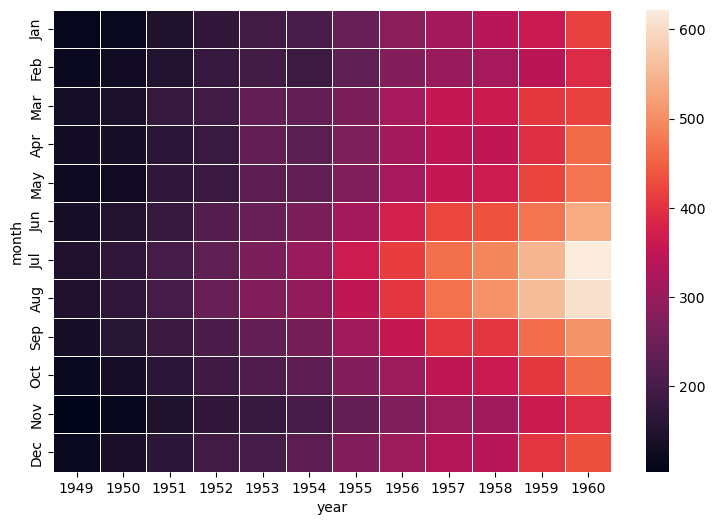

In [4]:
### Annotated heatmaps

# Load the example flights dataset and convert it to long-form
flights_long = sns.load_dataset("flights")

# Convert the dataset from long-form to wide-form using pivot_table
flights = flights_long.pivot_table(index="month", columns="year", values="passengers")

# Draw a heatmap without displaying numeric values in each cell
# Create a figure and axis object with specified size
fig, ax = plt.subplots(figsize=(9, 6))

# Plot a heatmap of the flights data with specified linewidths
sns.heatmap(flights, annot=False, linewidths=.5, ax=ax)

C:\Users\bisha\AppData\Local\Temp\ipykernel_16588\3397178925.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights = flights_long.pivot_table(index="month", columns="year", values="passengers")


<Axes: xlabel='year', ylabel='month'>

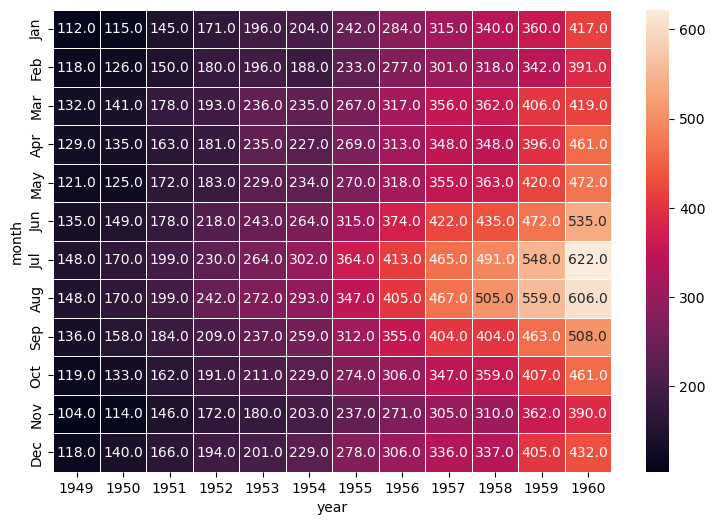

In [5]:
### Annotated heatmaps

# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
# Convert the dataset from long-form to wide-form using pivot_table
flights = flights_long.pivot_table(index="month", columns="year", values="passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt=".1f", linewidths=.5, ax=ax)


### Swarmplot

In [7]:
### Swarmplot

# Swarmplot used to display distribution of attributes.

# Import csv file of data
df = pd.read_csv ('data.csv', encoding='unicode_escape')
df.head()

# Create dataframe from some columns
df = df[['In_Out','Inner/_Outer_London', 'Happiness_score_2011-14_(out_of_10)', 'Anxiety_score_2011-14_(out_of_10)','Employment_rate_(%)_(2015)'
,'People_aged_17+_with_diabetes_(%)']]

# Cleaning data by changing some column names
df.rename(columns={'Inner/_Outer_London': 'in_out','Happiness_score_2011-14_(out_of_10)':'happiness', 'Anxiety_score_2011-14_(out_of_10)':'anxiety', 'Employment_rate_(%)_(2015)':'employment','People_aged_17+_with_diabetes_(%)':'diabetes' }, inplace=True)

# Reorder columns for better organization
df = df.reindex(columns=['diabetes', 'In_Out','in_out', 'happiness', 'anxiety', 'employment'])
df1 = df[['diabetes', 'happiness', 'anxiety']]  # Create DataFrame for specific columns
df2 = df[['In_Out','employment', 'happiness', 'anxiety']]  # Create DataFrame for specific columns
df3 = df[['in_out', 'employment', 'happiness', 'anxiety']]  # Create DataFrame for specific columns

# Create swarmplot using seaborn library
sns.swarmplot(data=df1)
plt.gca().set(ylabel='Value', xlabel='Indices')  # Set x and y labels for better understanding

KeyError: "['In_Out'] not in index"

### Barplot

In [9]:
### Barplot

# Presenting categorical data by bar chart or bar graph.

# Create a barplot using Seaborn's barplot function, passing the DataFrame df1 as the data
sns.barplot(data=df1)

# Set the y-axis label to 'Value' and the x-axis label to 'Indices'
plt.gca().set(ylabel='Value', xlabel='Indices')


NameError: name 'df1' is not defined

#### Stacked Barplot

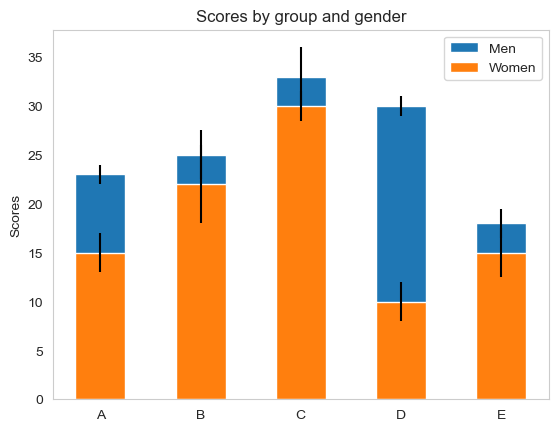

In [11]:
#### Stacked Barplot

# Define the categories
labels = ['A', 'B', 'C', 'D', 'E']

# Define the average scores for men and women
men_av = [23, 25, 33, 30, 18]
women_av = [15, 22, 30, 10, 15]

# Define the standard deviations for men and women
std_m = [1, 2.5, 3, 1, 1.5]
std_w = [2, 4, 1.5, 2, 2.5]

width = 0.5       # the width of the bars: can also be len(x) sequence

# Create a figure and axes object
fig, ba = plt.subplots()

# Plot the bars for men with error bars representing standard deviation
ba.bar(labels, men_av, width, yerr=std_m, label='Men')

# Plot the bars for women on top of the bars for men, forming a stacked bar plot
ba.bar(labels, women_av, width, yerr=std_w, label='Women')

# Set labels for y-axis and title
ba.set_ylabel('Scores')
ba.set_title('Scores by group and gender')

# Add legend to distinguish between men and women
ba.legend()

plt.show()

### Pairplot

In [12]:
### Pairplot

# Pairplot is used to present the distribution of variables and relationships between variables.

# Draw a pairplot to visualize the distribution of variables and relationships between variables.
# 'data=df3' specifies the DataFrame containing the variables to be plotted.
# 'hue='in_out'' assigns different colors to data points based on the 'in_out' variable.
sns.pairplot(data=df3, hue='in_out')


NameError: name 'df3' is not defined

### Scatterplot

In [13]:
### Scatterplot

# Scatter plot shows the relationship between two variables.

# Plot a scatterplot to visualize the relationship between employment and happiness,
# with points colored by the 'in_out' variable
sns.scatterplot(data=df3, x='employment', y='happiness', hue='in_out')

# Add a legend without a title at the bottom center position
plt.legend(title="", loc=8)


NameError: name 'df3' is not defined

#### 3D Scatterplot

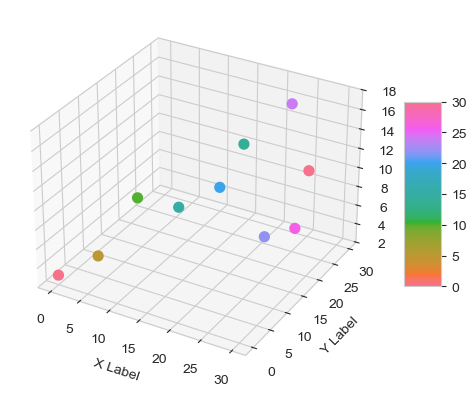

In [21]:
#### 3D Scatterplot

# Set the seaborn style to whitegrid with no gridlines on axes
sns.set_style("whitegrid", {'axes.grid': False})

# Create a new figure and axis for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Method 2 for creating 3D axes

# Create x, y, and z NumPy array data
X = np.array([0, 5, 10, 15, 20, 22, 26, 24, 14, 30])
Y = np.array([0, 3, 6, 9, 12, 22, 24, 26, 30, 20])
Z = np.array([3, 5, 11, 10, 12, 4, 5, 17, 10, 13])

# Get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# Create the scatter plot in 3D
g = ax.scatter(X, Y, Z, c=X, s=50, marker='o', cmap=cmap, alpha=1)

# Set x, y, and z labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Add a color bar which maps values to colors
fig.colorbar(g, shrink=0.5, aspect=5)

# Show the plot
plt.show()


#### Scatter plot with varying marker colors and sizes

C:\Users\bisha\AppData\Local\Temp\ipykernel_16588\2510156132.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  volume = (15 * data.Volume[:-2] / data.Volume[0])**2


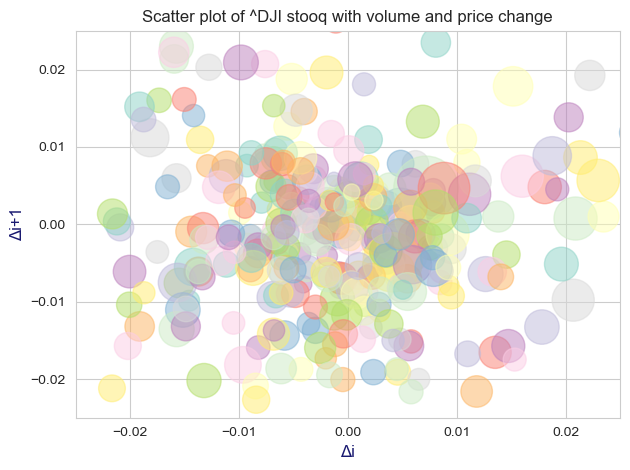

In [14]:
#### Scatter plot with varying marker colors and sizes

# Load data (^DJI stooq) from Pandas datareader
data = pdr.DataReader('^DJI', 'stooq')  # Data of ^DJI stooq market
data = data[-365:]  # get the most recent 365 days data

# Calculate price change percentage
delta1 = np.diff(data.Close) / data.Close[:-1]  # price of close day / price of close day before

# Calculate volume factor for marker size
volume = (15 * data.Volume[:-2] / data.Volume[0])**2

# Set color for 363 days from seaborn (color palette) library
colors = sns.color_palette("Set3", 363)

# Plotting to scatter plot
fig, pl = plt.subplots()
pl.scatter(delta1[:-1], delta1[1:], color=colors, s=volume, alpha=0.5)

# Set x, y labels and title
pl.set_xlabel(r'Δi', fontsize=12)
pl.set_ylabel(r'Δi+1', fontsize=12)
pl.xaxis.label.set_color('midnightblue')
pl.yaxis.label.set_color('midnightblue')
pl.set_title('Scatter plot of ^DJI stooq with volume and price change')
pl.grid(True)

# Set x, y limitations
pl.axis([-0.025, 0.025, -0.025, 0.025])  # xlim , ylim
fig.tight_layout()
plt.show()


### Jointplot

[Text(40.347222222222214, 0.5, 'Y'), Text(0.5, 38.72222222222221, 'X')]

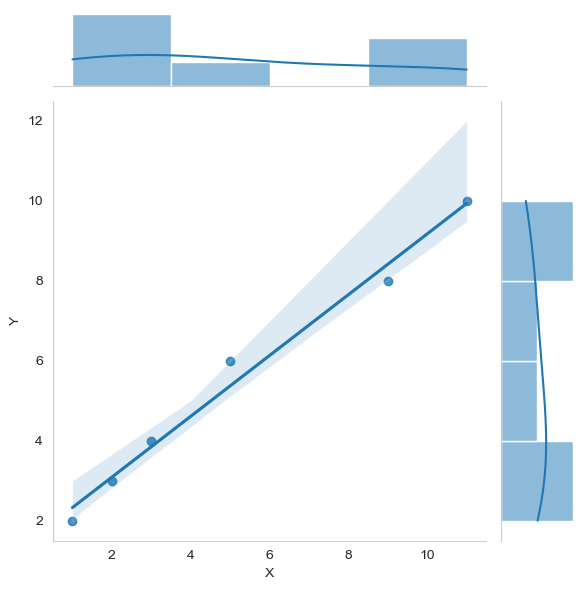

In [15]:
### Jointplot

# Besides showing the relationship between a dependent variable (Y) and an independent variable (X),
# it displays the distribution of X and Y.

# Sample data
x = (1, 3, 5, 2, 9, 11)
y = (2, 4, 6, 3, 8, 10)

# Create a DataFrame from the provided data (optional if data is not available)
df = pd.DataFrame({'X': x, 'Y': y})

# Plot a joint plot with a linear regression line
sns.jointplot(x='X', y='Y', data=df, kind="reg")
plt.gca().set(ylabel='Y', xlabel='X')  # Set Y label as 'Y' and X label as 'X'


### Piechart

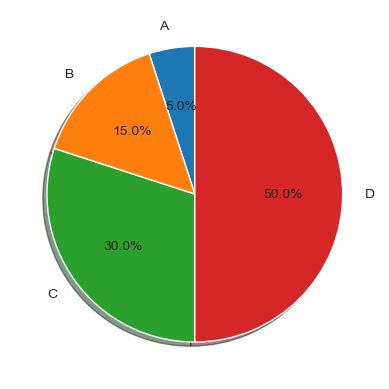

In [16]:
### Piechart

# create data
names = 'A', 'B', 'C', 'D',  # Names for each category in the pie chart
values = [5, 15, 30, 50]     # Corresponding values for each category

# create a pieplot
plt.pie(values, labels=names, labeldistance=1.15, shadow=True, startangle=90, autopct='%1.1f%%')
# Label distance: gives the space between labels and the center of the pie
plt.show()


### Boxplot

In [17]:
### Boxplot

# Load the dataset from a CSV file
df = pd.read_csv (r'D:\Python\Python_for_Researchers\sar_data.csv', encoding='unicode_escape')
df.head()

# Draw a boxplot to visualize the distribution of data
sns.boxplot(data=df, palette=["m", "g"])

# Remove the spines (the lines surrounding the plot)
sns.despine(offset=10, trim=True)

# Set labels for the y-axis and x-axis
plt.gca().set(ylabel='Value', xlabel='Sensor')


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Python\\Python_for_Researchers\\sar_data.csv'

### Histogram

C:\Users\bisha\AppData\Local\Temp\ipykernel_16588\1112000773.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  his = sns.distplot(bio)  # Plot the histogram using Seaborn's distplot function


Text(0, 0.5, 'Frequency')

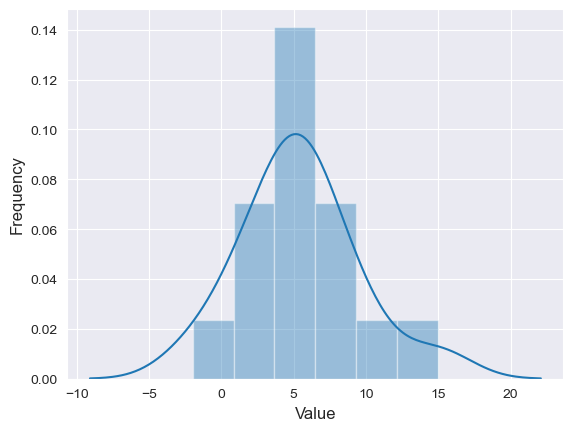

In [18]:
### Histogram
# It represents the distribution of numerical data.

bio = [-2, 1, 2, 4, 2, 5, 5, 5,6 , 7, 9, 7, 5, 10, 15] # create data

sns.set_style('darkgrid') # set grid style
his = sns.distplot(bio)  # Plot the histogram using Seaborn's distplot function
his.set_xlabel('Value', fontsize=12) # set x label
his.set_ylabel('Frequency', fontsize=12) # set y label


### Animated plot in Python

In [19]:
### Animated plot in Python

import pandas as pd
import matplotlib.pyplot as plt
import imageio

# read the data 
data = pd.read_csv(r'd://myPub1.csv')
# Check the first 5 rows
data.head(5)

# And I need to transform my categorical column (continent) in a numerical value group1->1, group2->2...
data['Open']=pd.Categorical(data['Open'])

# List to store file names
file_names = []

# For each year:
for i in data.Year.unique():
 
    # Turn interactive plotting off
    plt.ioff()

    # initialize a figure
    fig = plt.figure(figsize=(10, 6))
    
    # Find the subset of the dataset for the current year
    subsetData = data[ data.Year == i ]

    # Build the scatterplot
    plt.scatter(
        x=subsetData['Cum_Publications'], 
        y=subsetData['Cum_Citations'], 
        s=subsetData['Cum_Citations']*15, 
        edgecolors="white", linewidth=2, color = 'midnightblue')
    
    # Add titles (main and on axis)
    plt.yscale('linear')
    plt.xlabel("Publication")
    plt.ylabel("Citation"),
    plt.title("Azad Rasul's Cumulative Publications and Citations during: "+str(i) )
    plt.ylim(-50, 500)
    plt.xlim(0, 25)
    
    # Save the figure
    filename='/Users/gardi/Desktop/test/myPubCum'+str(i)+'.png'
    plt.savefig(fname=filename, dpi=96)
    plt.gca()
    plt.close(fig)
    
    # Append the file name to the list
    file_names.append(filename)

# Create a GIF from the saved PNG files
with imageio.get_writer('/Users/gardi/Desktop/test/myPubCum.gif', mode='I', loop=0) as writer:
    for filename in file_names:
        image = imageio.imread(filename)
        writer.append_data(image)


FileNotFoundError: [Errno 2] No such file or directory: 'd://myPub1.csv'

#### Animated scatterplot 

In [27]:
#### Animated scatterplot 

import pandas as pd
import matplotlib.pyplot as plt
import imageio

# read the data (on the web)
data = pd.read_csv('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/gapminderData.csv')

# Check the first 2 rows
data.head(10)

# And I need to transform my categorical column (continent) in a numerical value group1->1, group2->2...
data['continent']=pd.Categorical(data['continent'])

# Set the figure size
plt.figure(figsize=(10, 10))

# Subset of the data for year 1952
data1952 = data[ data.year == 1952 ]

# image resolution
dpi=96

# List to store file names
file_names = []

# For each year:
for i in data.year.unique():
 
    # Turn interactive plotting off
    plt.ioff()

    # initialize a figure
    fig = plt.figure(figsize=(680/dpi, 480/dpi), dpi=dpi)
    
    # Find the subset of the dataset for the current year
    subsetData = data[ data.year == i ]

    # Build the scatterplot
    plt.scatter(
        x=subsetData['lifeExp'], 
        y=subsetData['gdpPercap'], 
        s=subsetData['pop']/200000 , 
        c=subsetData['continent'].cat.codes, 
        cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
    
    # Add titles (main and on axis)
    plt.yscale('log')
    plt.xlabel("Life Expectancy")
    plt.ylabel("GDP per Capita")
    plt.title("Year: "+str(i) )
#    plt.ylim(0,100000)
    plt.xlim(30, 90)
    
    # Save the figure
    filename='/Users/gardi/Desktop/test/Gapminder_step'+str(i)+'.png'
    plt.savefig(fname=filename, dpi=96)
    plt.gca()
    plt.close(fig)
    
    # Append the file name to the list
    file_names.append(filename)

# Create a GIF from the saved PNG files with loop parameter set to 0
with imageio.get_writer('/Users/gardi/Desktop/test/Gapminder.gif', mode='I', loop=0) as writer:
    for filename in file_names:
        image = imageio.imread(filename)
        writer.append_data(image)


C:\Users\gardi\AppData\Local\Temp\ipykernel_14252\2791378802.py:68: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


### Categorical data (catplot)

In [28]:
### Categorical data (catplot)
# If the variables are “categorical” (divided into discrete groups) it may be advantageous to use catplot. 
# We can change the plot type by change: "kind" to violin, swarm, boxen, strip, box, point, bar or count. 

#### Violin Catplot

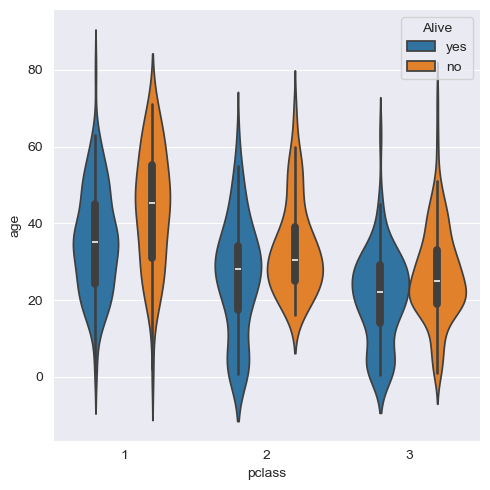

In [20]:
#### Violin Catplot

# Load titanic.csv file from load_dataset function in Seaborn library.
titanic = sns.load_dataset("titanic") # load titanic csv file from seaborn lab

# Create a violin catplot to visualize the distribution of age across passenger class with respect to survival
g = sns.catplot(x='pclass', y="age",
                hue="alive",  # categorize and change the color by alive column data
                data=titanic, kind='violin', legend_out=False) # legend_out = False to move legend to inside the plot

# Add legend with title "Alive" at the upper right corner
plt.legend(title="Alive", loc=1) # Location: 'upper right':1
plt.show()

#### Swarm Catplot

C:\Users\gardi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gardi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gardi\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gardi\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 18.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gardi\anacon

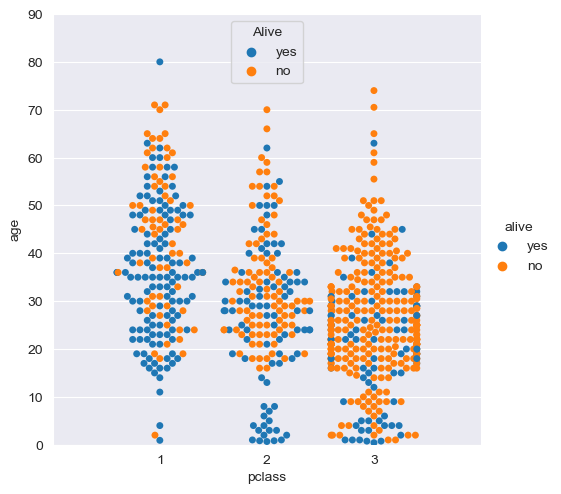

In [33]:
#### Swarm Catplot

titanic = sns.load_dataset("titanic") # load data

# Create a categorical plot using swarmplot
g = sns.catplot(x='pclass', y="age",
                hue="alive",
                data=titanic, kind='swarm', legend_out=False)

# Set the axis limits
plt.axis([-1, 3, 0, 90]) # xlim , ylim

# Add legend with specified title and location
plt.legend(title="Alive", loc=9) # Location: 'upper center':9
plt.show()

#### Boxen Catplot

C:\Users\gardi\anaconda3\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gardi\anaconda3\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gardi\anaconda3\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gardi\anaconda3\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

<Figure size 1000x1000 with 0 Axes>

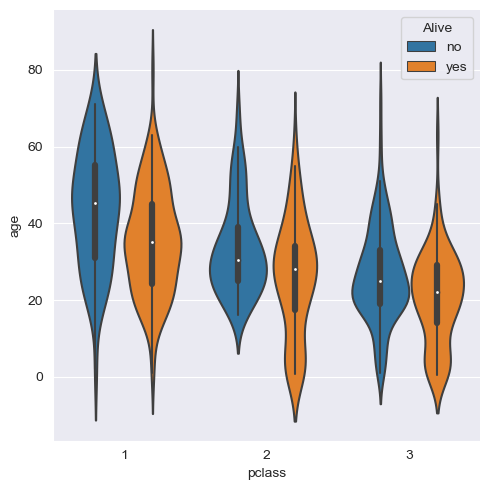

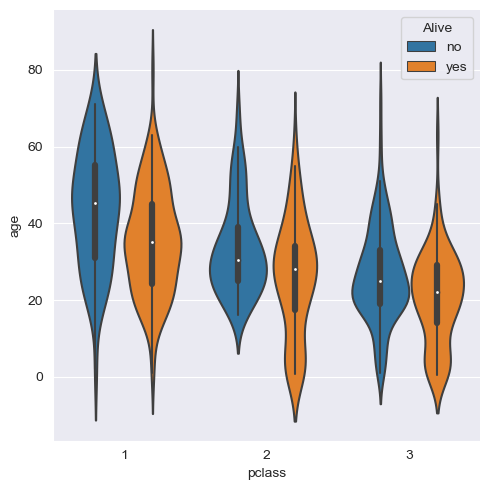

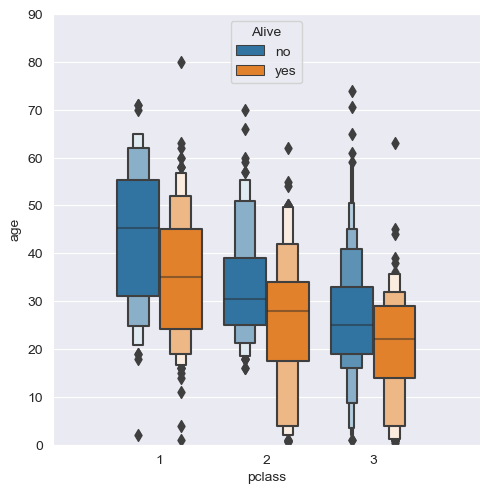

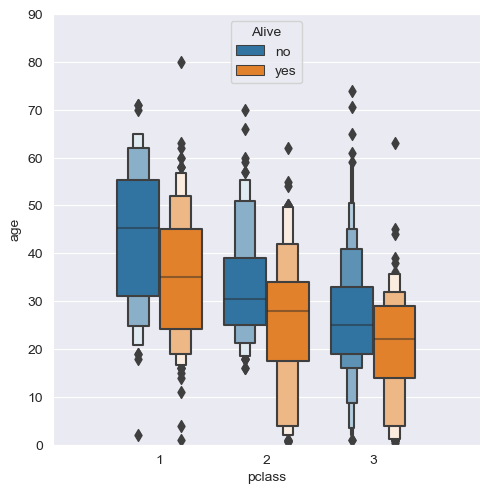

In [32]:
#### Boxen Catplot

# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Create a categorical plot (catplot) with boxen plot type
g = sns.catplot(x='pclass', y="age",
                hue="alive",
                data=titanic, kind='boxen', legend_out=False)

# Set axis limits
plt.axis([-1, 3, 0, 90])  # xlim , ylim

# Add legend with specified title and location
plt.legend(title='Alive', loc=9)
plt.show()

#### Strip Catplot

C:\Users\gardi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gardi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


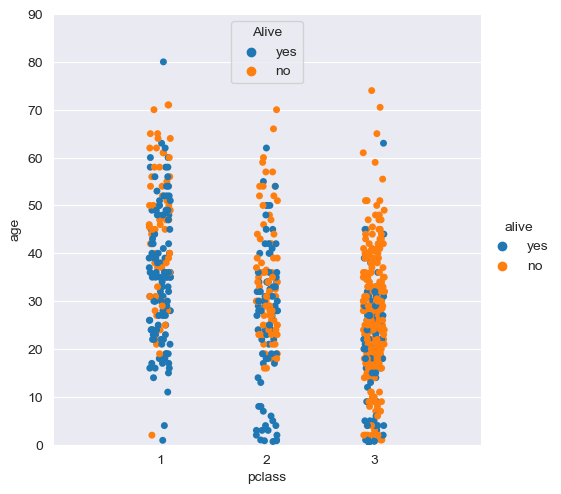

In [36]:
#### Strip Catplot

# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Create a categorical plot (catplot) with strip plot type
g = sns.catplot(x='pclass', y="age",
                hue="alive",
                data=titanic, kind='strip', legend_out=False)

# Set axis limits
plt.axis([-1, 3, 0, 90])  # xlim , ylim

# Add legend with specified title and location
plt.legend(title='Alive', loc=9)

# Show the plot
plt.show()


#### Box Catplot

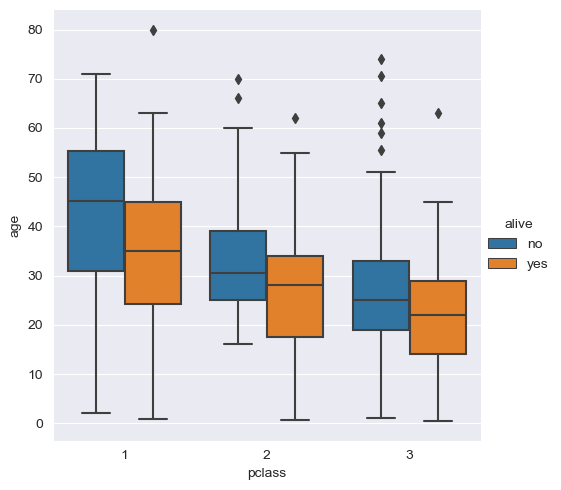

In [39]:
#### Box Catplot

# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Create a categorical plot (catplot) with box plot type
g = sns.catplot(x='pclass', y="age",
                hue="alive",
                data=titanic, kind='box')

# Display the plot
plt.show()


#### Point Catplot

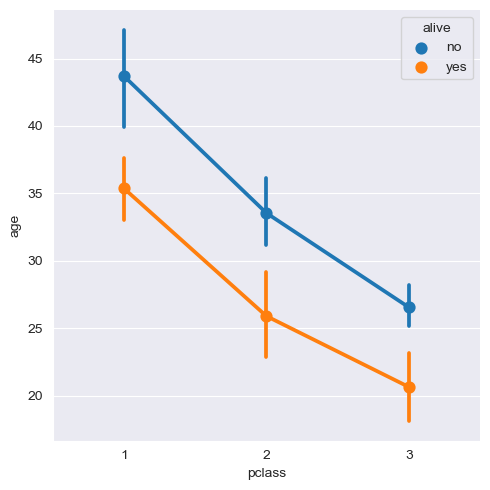

In [41]:
#### Point Catplot

# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Create a categorical plot (catplot) with point plot type
g = sns.catplot(x='pclass', y="age",
                hue="alive",
                data=titanic, kind='point', legend_out=False)

# Display the plot
plt.show()


#### Bar Catplot

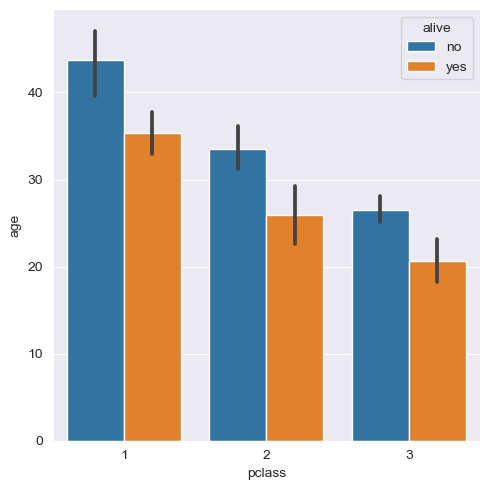

In [43]:
#### Bar Catplot

# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Create a categorical plot (catplot) with bar plot type
g = sns.catplot(x='pclass', y="age",
                hue="alive",
                data=titanic, kind='bar', legend_out=False)

# Display the plot
plt.show()


####  Count Catplot

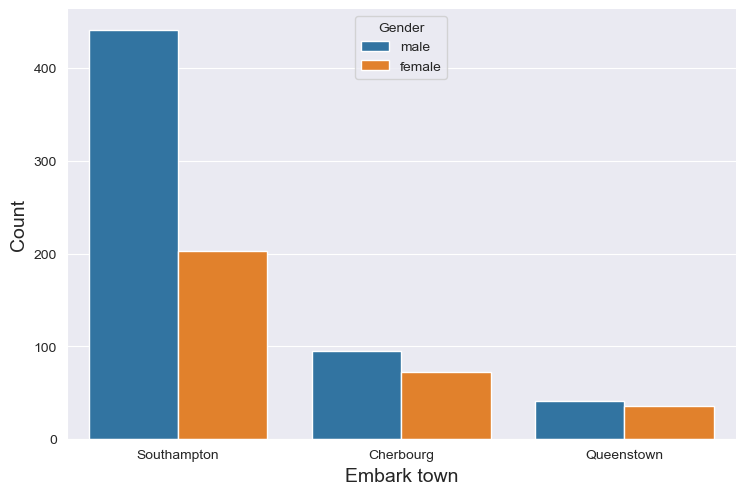

In [45]:
####  Count Catplot

# Create a categorical plot (catplot) with count plot type
sns.catplot(x='embark_town',
            kind="count",
            hue="sex",
            data=titanic,
            height=5,
            aspect=1.5, legend_out=False)

# Set labels for x-axis and y-axis
plt.xlabel("Embark town", size=14)
plt.ylabel("Count", size=14)

# Add legend with specified title and location
plt.legend(title="Gender", loc=9)  # Location: 'upper center':9

# Show the plot
plt.show()
